# Import libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro, anderson, normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [72]:
df = pd.read_csv(r"C:\Users\Shivan\OneDrive\Desktop\ITDAA4-12 - Data Mining and Data Administration module\Project\heart (1).csv", sep = ";")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Columns**

- Age
- Sex
- Chest Pain Type (CP)
- Resting blood pressure (mm Hg) (trestbps)
- Serum cholestoral (mg/dl) (chol)
- Fasting blood sugar > 120 mg/dl (fbs)
- Resting electrocardiographic results (restecg)
- Max heart rate achieved (thalach)
- Exercise included angina (exang)
- ST depression included by exercise relative to rest (oldpeak)
- Slope of the peak exercise ST segment (slope)
- Number of major vessels coloured by fluoroscopy (ca)
- Status of the heart (thal)
- target (diagnosed with Heart Disease )

In [8]:
df.shape

(303, 14)

# Data Preperation

## Check for null values

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Check for duplicates

In [4]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

1


In [19]:
df_duplicated = df[df.duplicated()]

In [20]:
df_duplicated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [22]:
age_38 = df[df['age']==38]

In [23]:
age_38

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [73]:
df = df.drop_duplicates()

In [6]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


## Create a new df containing all patients that have heart disease (for visualisations)

In [4]:
# Heart disease df
HD_df = df[df["target"] == 1]

In [6]:
HD_df.shape

(164, 14)

In [7]:
NO_HD_df = df[df["target"] == 0]

In [8]:
NO_HD_df.shape

(138, 14)

In [9]:
HD_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
HD_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
HD_df.shape

(164, 14)

In [11]:
HD_df.to_excel("HD dataset.xlsx")

# Data preprocessing

## Remove outliers

In [74]:
df2 = df.copy()

In [78]:
numerical_variables = ['age' , 'trestbps', 'chol', 'thalach', 'oldpeak', ]

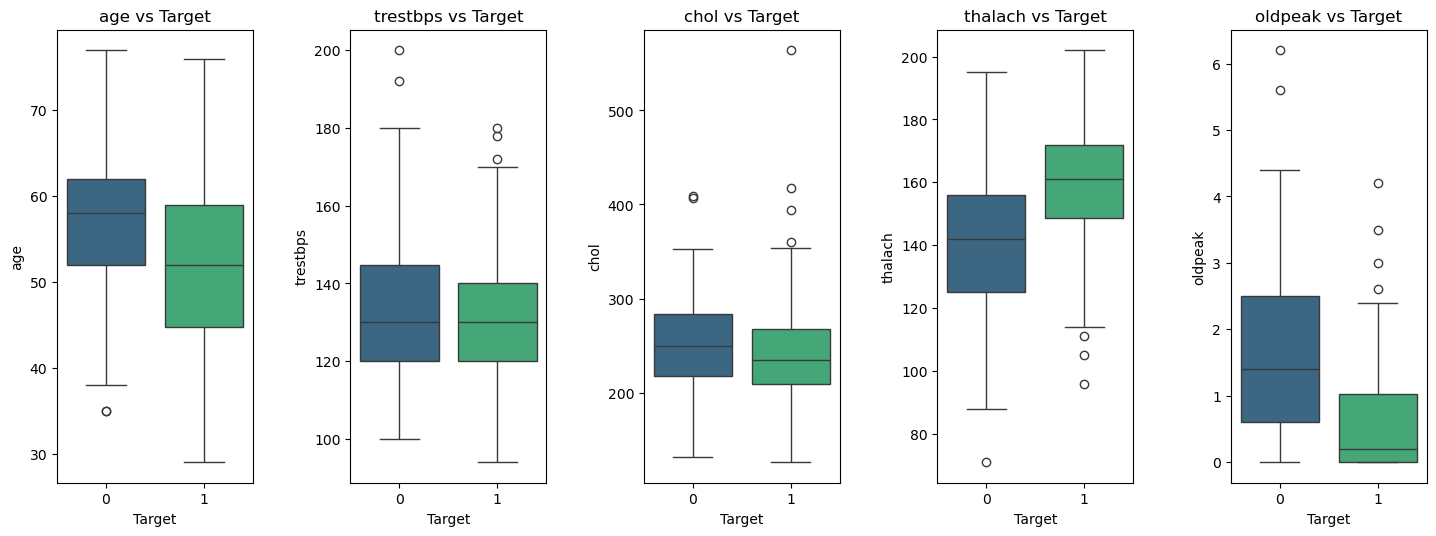

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))
for i in range(5):
    sns.boxplot(x='target', y= numerical_variables[i], data=df, palette='viridis',ax=axes[i])
    axes[i].set_title( f'{numerical_variables[i]} vs Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(f'{numerical_variables[i]}')

plt.tight_layout(pad=3.0)


In [75]:
# remove outliers
def remove_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter data to remove outliers in this column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the dataset based on all numerical columns
df2 = remove_outliers(df2, numerical_variables)


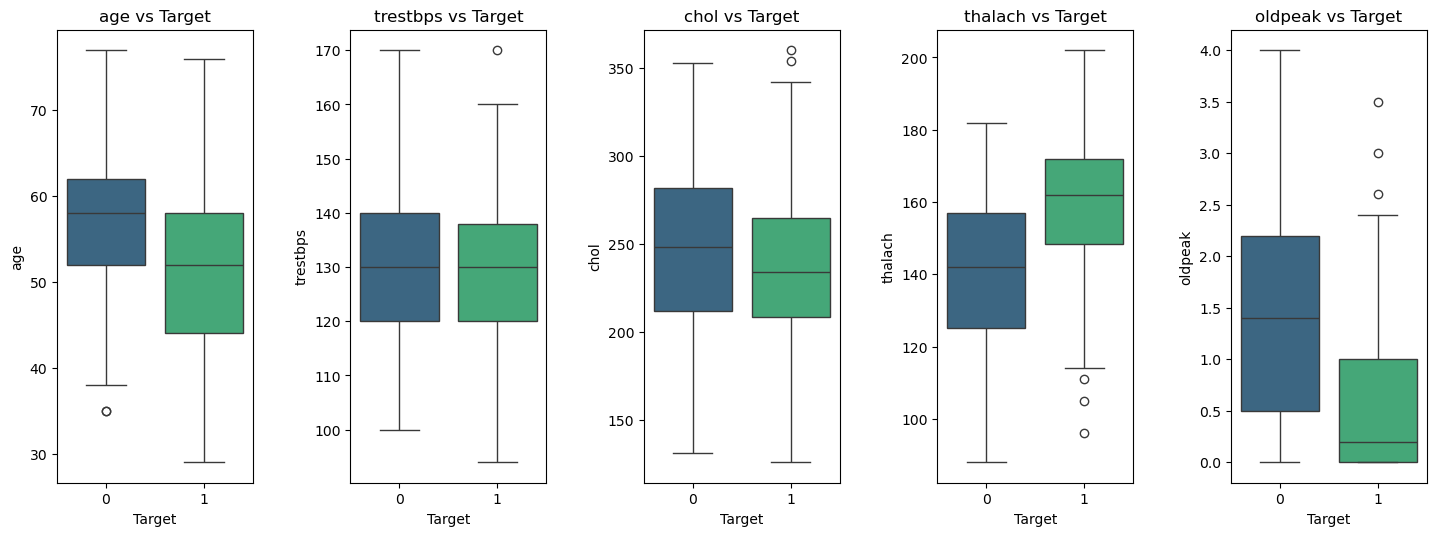

In [82]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))

for i in range(5):
    sns.boxplot(x='target', y= numerical_variables[i], data=df2, palette='viridis',ax=axes[i])
    axes[i].set_title( f'{numerical_variables[i]} vs Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(f'{numerical_variables[i]}')
    
plt.tight_layout(pad=3.0)

## Normalise data

## Normalise data to the same scale

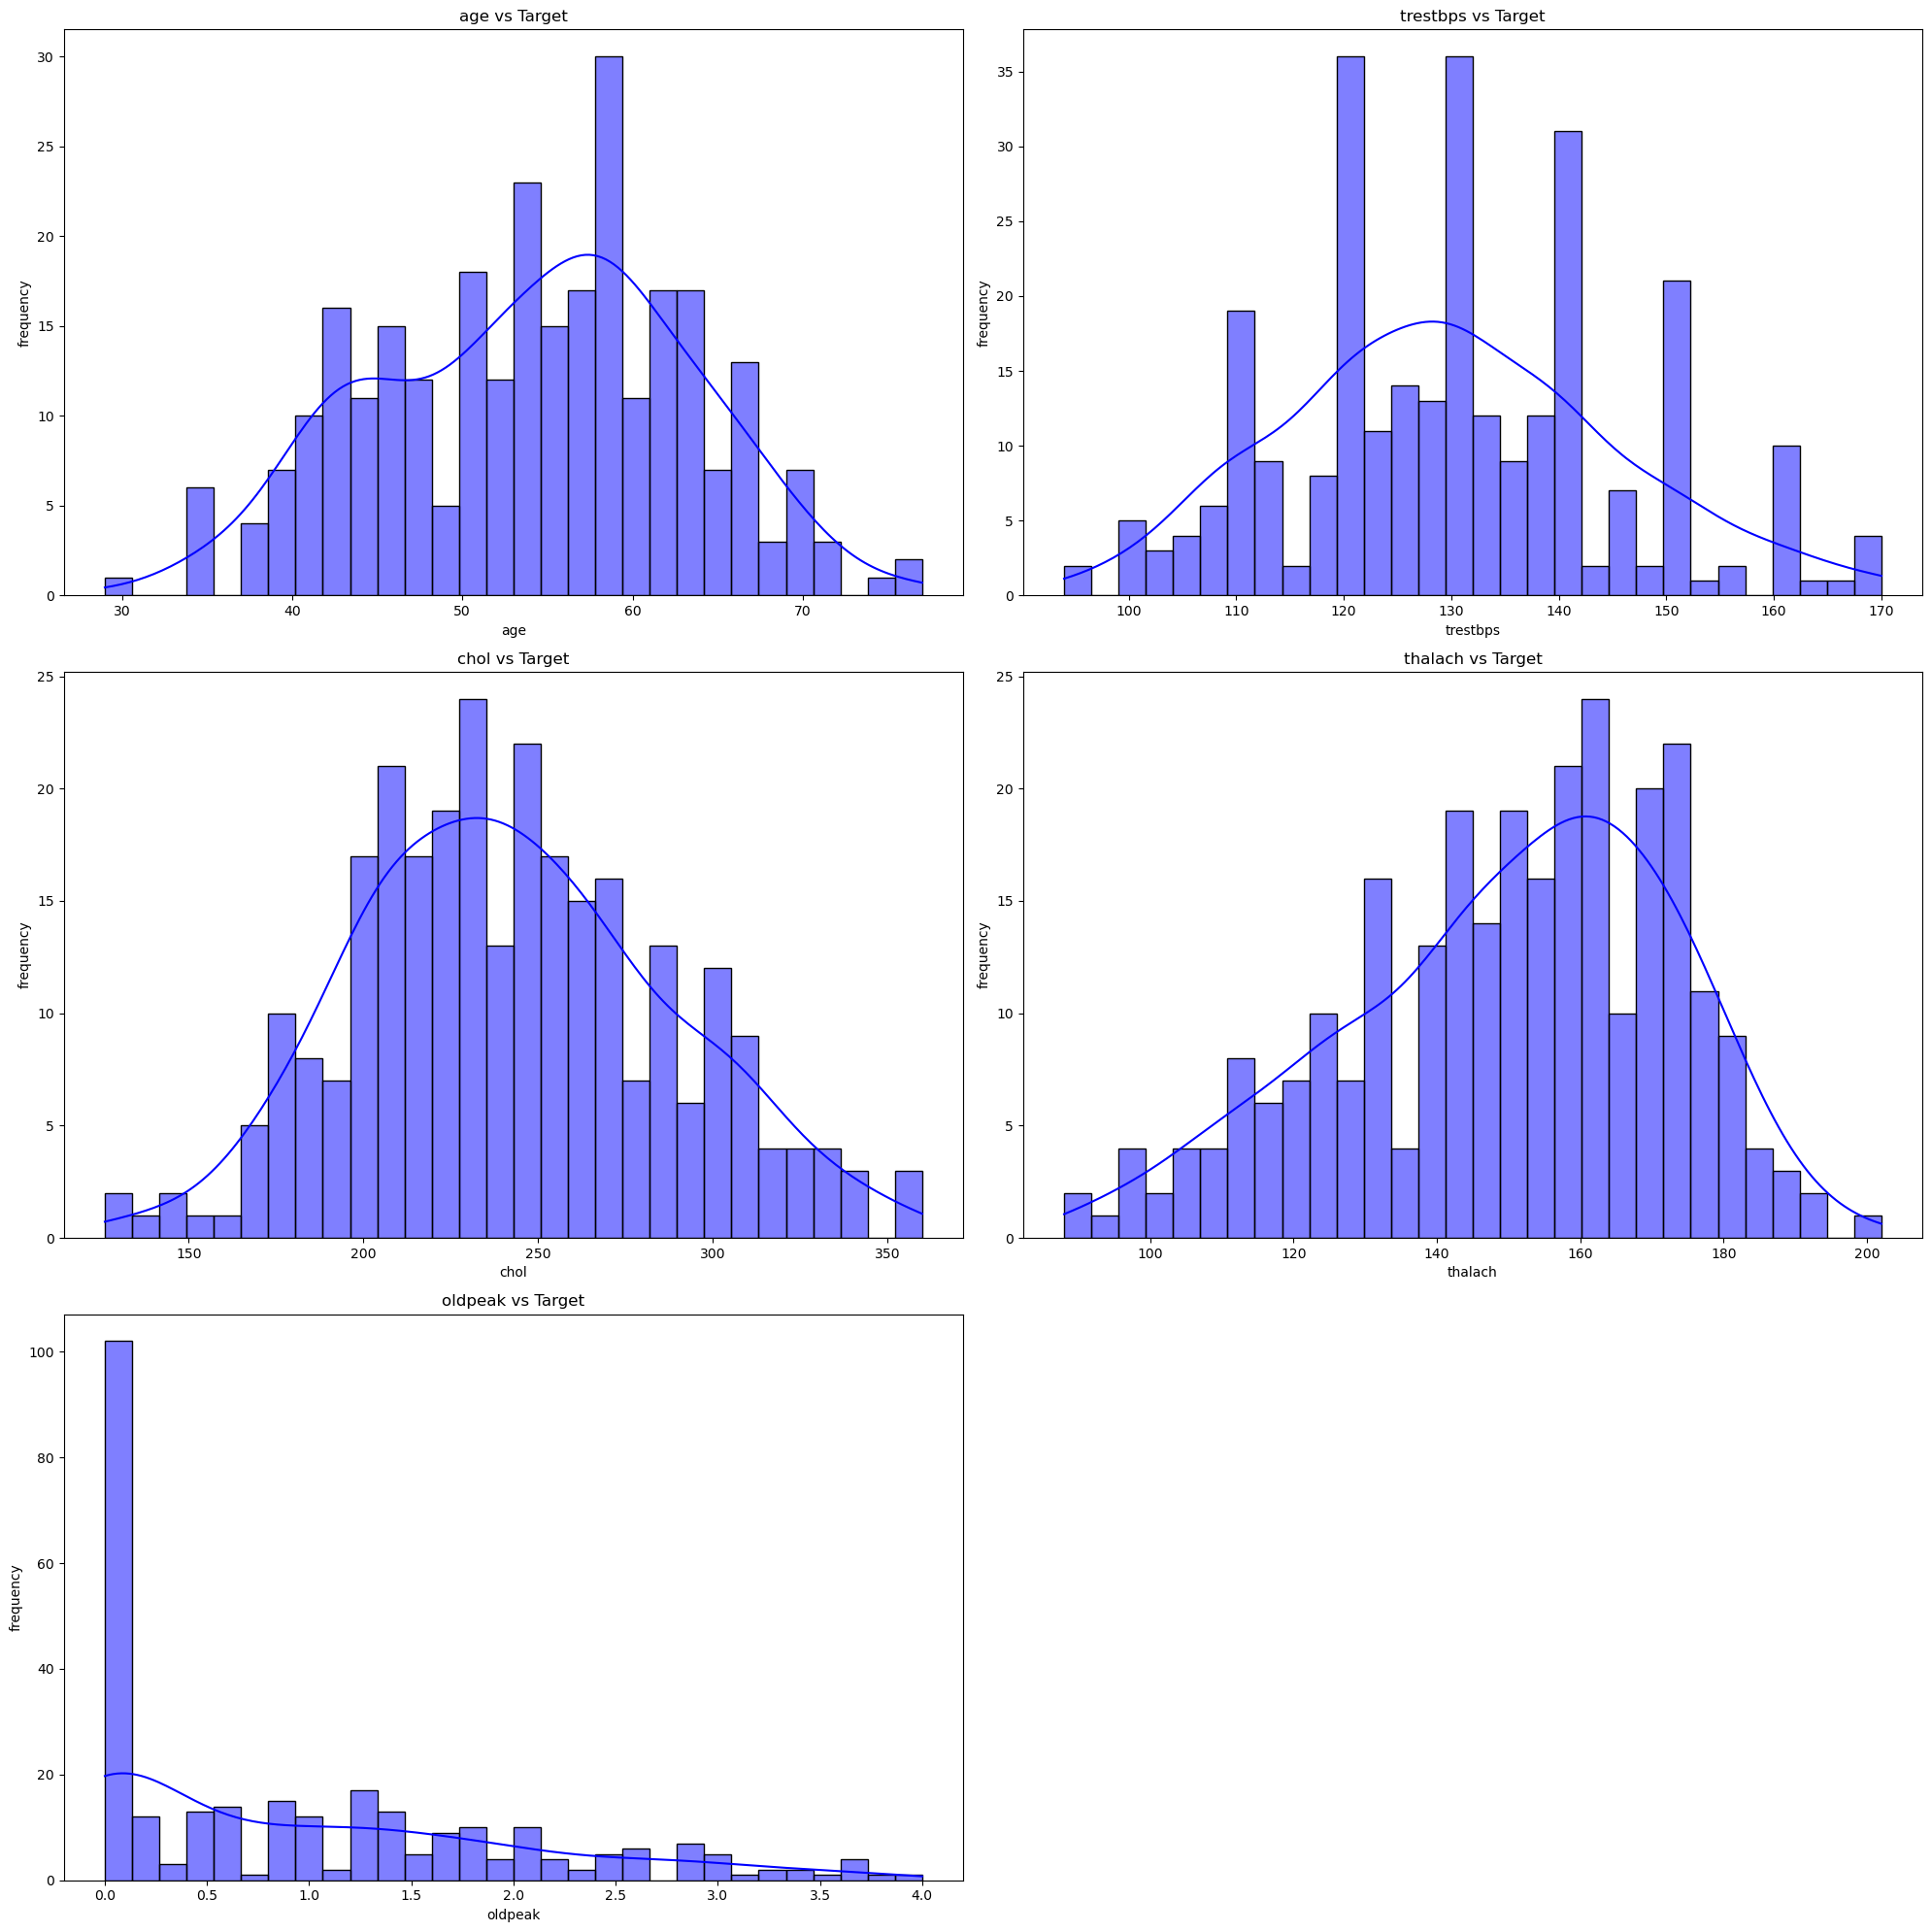

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes = axes.flatten() 

for i in range(5):
    sns.histplot(df[f'{numerical_variables[i]}'], bins=30, kde=True, color="blue", ax=axes[i])
    axes[i].set_title( f'{numerical_variables[i]} vs Target')
    axes[i].set_xlabel(numerical_variables[i])
    axes[i].set_ylabel('frequency')

# plt.tight_layout(pad=3.0)
# Hide any unused subplots if num_cols < 6
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

inconsistent scales. oldpeak is scaled from [0-1] while teh other coulumns are whole numbers. Hence, Normalizing the numerical columns so they are on the same scale using Min-Max scaling. 

In [83]:
scaler = MinMaxScaler()
# Scale only the numerical features (excluding target)

df2[numerical_variables] = scaler.fit_transform(df2[numerical_variables])

In [84]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1


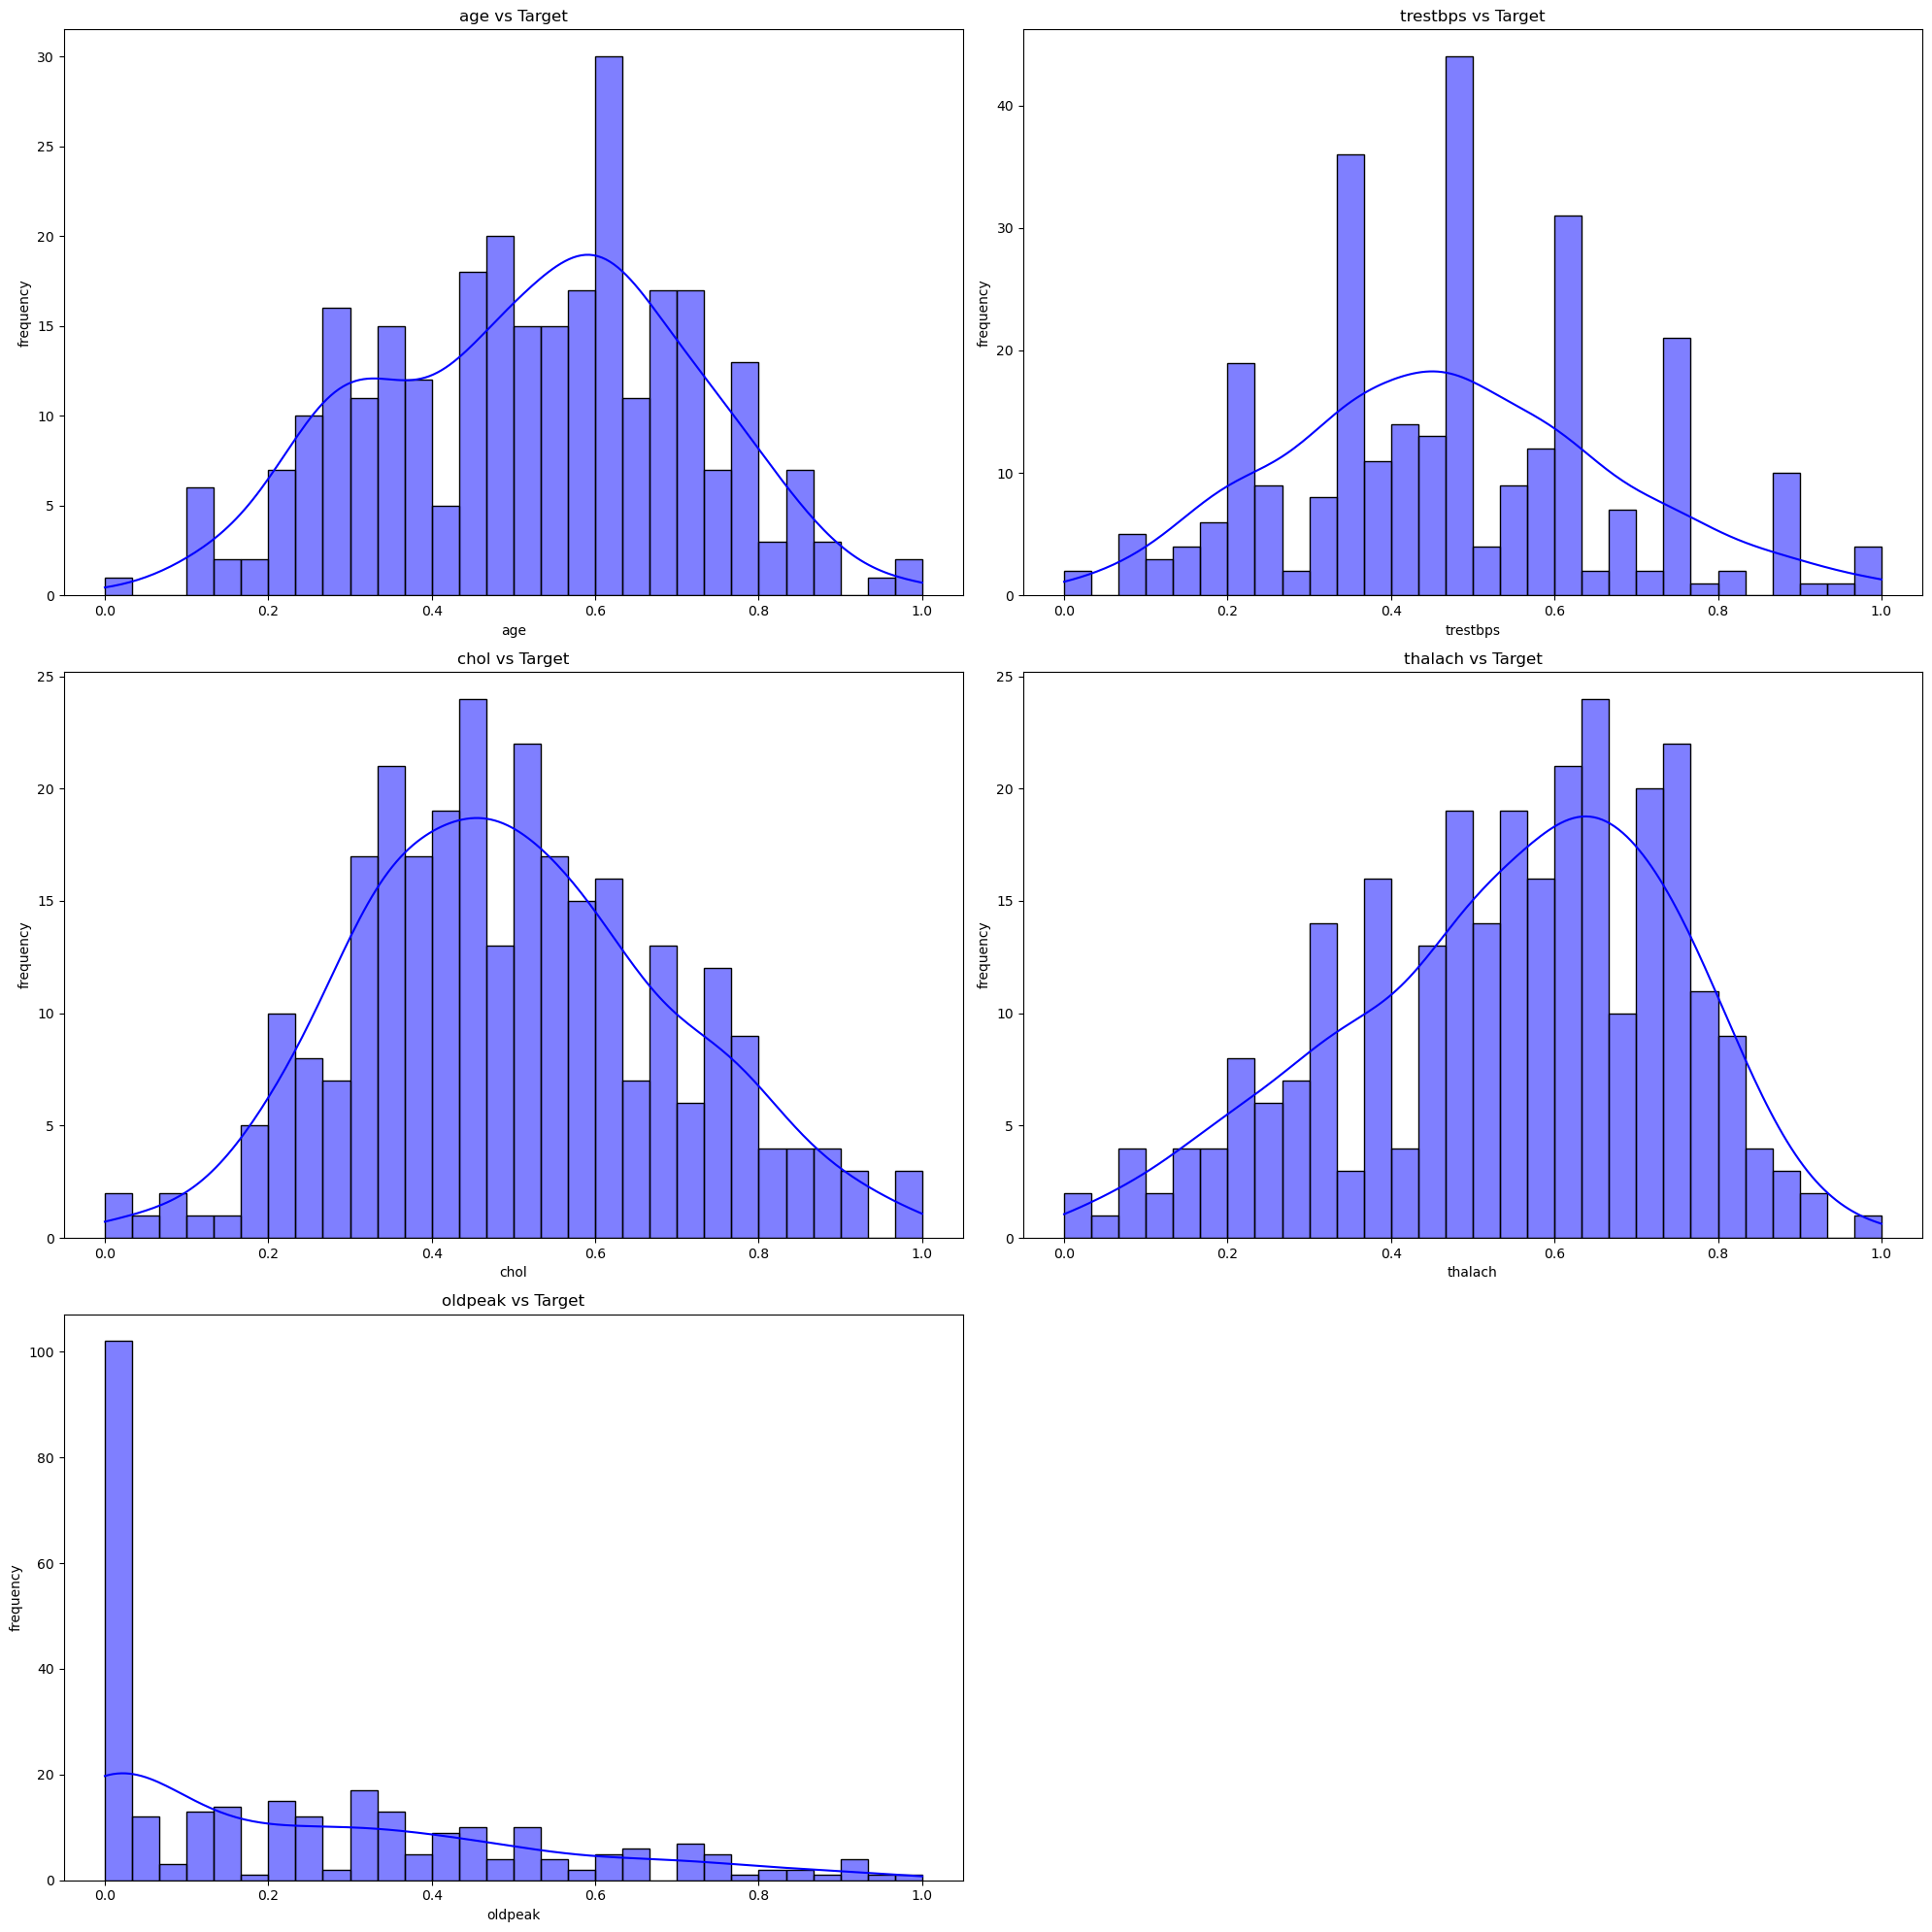

In [85]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes = axes.flatten() 

for i in range(5):
    sns.histplot(df2[f'{numerical_variables[i]}'], bins=30, kde=True, color="blue", ax=axes[i])
    axes[i].set_title( f'{numerical_variables[i]} vs Target')
    axes[i].set_xlabel(numerical_variables[i])
    axes[i].set_ylabel('frequency')

# plt.tight_layout(pad=3.0)
# Hide any unused subplots if num_cols < 6
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Test for Normality 

In [86]:
# Initialize normality results
normality_results = []

for col in numerical_variables:
    stat, p = shapiro(df2[col])  # Shapiro-Wilk Test
    normality_results.append([col, p])

# Convert to DataFrame
normality_df = pd.DataFrame(normality_results, columns=["Variable", "P-Value"])

# Interpret results
normality_df["Normality"] = np.where(normality_df["P-Value"] > 0.05, "Likely Normal", "Not Normal")

# Print results
print(normality_df)

   Variable       P-Value      Normality
0       age  1.769295e-02     Not Normal
1  trestbps  3.040394e-03     Not Normal
2      chol  1.980655e-01  Likely Normal
3   thalach  5.999535e-05     Not Normal
4   oldpeak  1.492345e-15     Not Normal


## Data Sampling

In [94]:
df.shape

(302, 14)

In [96]:
df2.shape #df2 has outliers removed

(283, 14)

In [95]:
print("Original class distribution:")
print(df2["target"].value_counts())

# target=1 indicates heart disease and target=0 indicates healthy,
# find the minority class size.
min_count = df2["target"].value_counts().min()

# Undersample the majority class to match the minority class count
df_majority = df2[df_no_outliers["target"] == df2["target"].value_counts().idxmax()]
df_minority = df2[df_no_outliers["target"] == df2["target"].value_counts().idxmin()]

# Randomly sample from the majority class
df_majority_balanced = df_majority.sample(n=min_count, random_state=42)
# Combine balanced data
df_balanced = pd.concat([df_majority_balanced, df_minority])

# Verify new class distribution
print("\nBalanced class distribution:")
print(df_balanced["target"].value_counts())


Original class distribution:
target
1    158
0    125
Name: count, dtype: int64

Balanced class distribution:
target
1    125
0    125
Name: count, dtype: int64


In [54]:
df_balanced

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [97]:
df3 = df_balanced.copy()

# Exploratory Data Analysis (EDA)

## Categorical columns analysis

### Chi-Square Test & Craemer's V

**Chi-Square test** - checks if there's a significant relationship between categorical variables.

- p-value < 0.05 → Significant relationship
- p-value ≥ 0.05 → No strong relationship

**Cramér's V** - is a statistical measure of the association between two categorical variables

- 0.1 (weak)
- 0.3 (moderate)
- 0.5+ (strong association)

In [25]:
df.columns[:-1] #independent variables

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [21]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Function to calculate Cramér’s V
def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k - 1, r - 1)))

chi2_results = []
cramers_v_results = []

# Compute Chi2 and Cramér’s V for each categorical variable
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["target"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    cramer_v_value = cramers_v(chi2, df.shape[0], contingency_table.shape[1], contingency_table.shape[0])

    chi2_results.append([col, chi2, p])
    cramers_v_results.append([col, cramer_v_value])

# Convert results to DataFrames
chi2_df = pd.DataFrame(chi2_results, columns=["Variable", "Chi2 Statistic", "P-value"])
cramers_v_df = pd.DataFrame(cramers_v_results, columns=["Variable", "Cramér’s V"])

# Merge results for display
results_df = chi2_df.merge(cramers_v_df, on="Variable")

In [22]:
results_df["P-value"] = results_df["P-value"].round(2)
results_df["Cramér’s V"] = results_df["Cramér’s V"].round(1)
# Display updated results

In [23]:
print(results_df)

  Variable  Chi2 Statistic  P-value  Cramér’s V
0      sex       23.083879     0.00         0.3
1       cp       80.978762     0.00         0.5
2      fbs        0.092408     0.76         0.0
3  restecg        9.729682     0.01         0.2
4    exang       55.456203     0.00         0.4
5    slope       46.889477     0.00         0.4
6       ca       73.689846     0.00         0.5
7     thal       84.610318     0.00         0.5


### Conclusion

- Sex
- Chest Pain Type (CP)
- Resting electrocardiographic results (restecg)
- Exercise included angina (exang)
- ST depression included by exercise relative to rest (oldpeak) ***
- Slope of the peak exercise ST segment (slope)
- Number of major vessels coloured by fluoroscopy (ca)
- Status of the heart (thal)

Have P-values < 0.05,
Hence, all these properties have a significant relationship between Heart Disease (target)

- Fasting blood sugar > 120 mg/dl (fbs)

Has a P-values >= 0.05,
Hence, this property does not have a significant relationship between Heart Disease (target)

## Numerical columns analysis

### The Point-Biserial Correlation Coefficient & Pearson Correlation Coefficient

reference: https://datatab.net/tutorial/point-biserial-correlation

**The Point-Biserial Correlation Coefficient** - a special case of Pearson correlation and examines the relationship between a dichotomous variable (variable with 2 possible outcomes) and a metric variable.

**The Pearson correlation coefficient (r)** - the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables

**But no matter if we calculate the Pearson correlation or if we use the equation for the point biserial correlation. We get the same result both times!**

**Statistical Significance (p-value)**
- p < 0.05 → The correlation is statistically significant (unlikely due to chance).
- p > 0.05 → No strong evidence of a correlation

**Correlation Coefficient (r):**
- r > 0 → Positive correlation: As one variable increases, the other also increases.
- r < 0 → Negative correlation: As one variable increases, the other decreases.
- r = 0 → No correlation: No linear relationship between the two variables.



In [66]:
numerical_cols = ['oldpeak', 'trestbps', 'chol', 'thalach' ]

# Create an empty list to store results
results = []

for col in numerical_cols:
        corr, p_value = stats.pearsonr(df[col], df["target"])
        results.append({"Variable": col, "Pearson Correlation": round(corr, 2), "P-value": round(p_value, 2)})

# Convert results into a DataFrame
correlation_df = pd.DataFrame(results)

print(correlation_df)


   Variable  Pearson Correlation  P-value
0   oldpeak                -0.43     0.00
1  trestbps                -0.12     0.05
2      chol                -0.11     0.08
3   thalach                 0.42     0.00


**Statistical Significance (p-value)**

- ST depression included by exercise relative to rest (oldpeak)
- Resting blood pressure (mm Hg) (trestps)
- Max heart rate achieved (thalach)

Have P-values < 0.05, Hence, in all these properties, the correlation is statistically significant (unlikely due to chance).

- Serum cholestoral (mg/dl) (chol)

Has a P-value > 0.05, Hence, there is no strong evidence of a correlation

**Correlation Coefficient (r)**

- ST depression included by exercise relative to rest (oldpeak)
- Resting blood pressure (mm Hg) (trestps)
- **NOTE** (I did not consider the correlation coefficicent of "chol" becase there is no strong evidence of a correlation)

Have negative correlation: As one variable increases, the other decreases.
Hence:
- As ST depression included by exercise relative to rest increases, the risk of Heart Disease decreases
- As Resting blood pressure increases, the risk of Heart Disease decreases
- As Max heart rate achieved  increases, the risk of Heart Disease increases



By looking at the p values of 'oldpeak', 'trestbps' and 'thalach' have a signifcant correlation to heart disease. But the Correalation Coefficient (r) for all variables dont seem to make sense. For eg, 'chol' has a negative correlation, so as 'chol' increases, heart disease will decrease. This contradicts actual research that has been done. This is probably becasue there is too less observations in the dataset to make a conclusion on the numerical variables.

# Models

**Key Metrics for Evaluating Classification Models**

1. **Accuracy** -
Overall Performance of model

2. **AUC-ROC (Overall Model Discrimination)** -
Measures the ability of the model to separate classes

- AUC = 1 → Perfect classifier
- AUC = 0.5 → Random guessing

In [99]:
X = df3.drop(columns=["target"]) #df3 is the down-sampled, scaled data with no outliers
y = df3["target"]

In [101]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [103]:
logit_model = LogisticRegression()

logit_model.fit(X_train, y_train)

y_pred = logit_model.predict(X_test)

In [104]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.84


In [130]:
y_prob = logit_model.predict_proba(X_test)[:, 1] if hasattr(logit_model, "predict_proba") else None

auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC:  {auc_roc:.2f}")


AUC-ROC:  0.86


## Support Vector Machine (SVM)

In [121]:
svm_model = SVC(kernel='linear', probability=True, random_state=15) # Linear Kernel

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


In [122]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.82


In [131]:
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_roc:.2f}")

AUC-ROC: 0.85


## NOTE!

NB: if you're using models that are sensitive to feature magnitudes, scale the numerical features. However in Decision Trees and Gradient Boosting Classifier are tress based models and do not require scaling because they are based on splits rather than distances.

In [140]:
X = df.drop(columns=["target"]) # orignial data
y = df["target"]

In [141]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [142]:
decision_tree = DecisionTreeClassifier(random_state=15)

decision_tree.fit(X, y)

y_pred = decision_tree.predict(X_test)


In [143]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [144]:
y_prob = decision_tree.predict_proba(X_test)[:, 1] if hasattr(decision_tree, "predict_proba") else None

auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC:  {auc_roc:.2f}")


AUC-ROC:  1.00


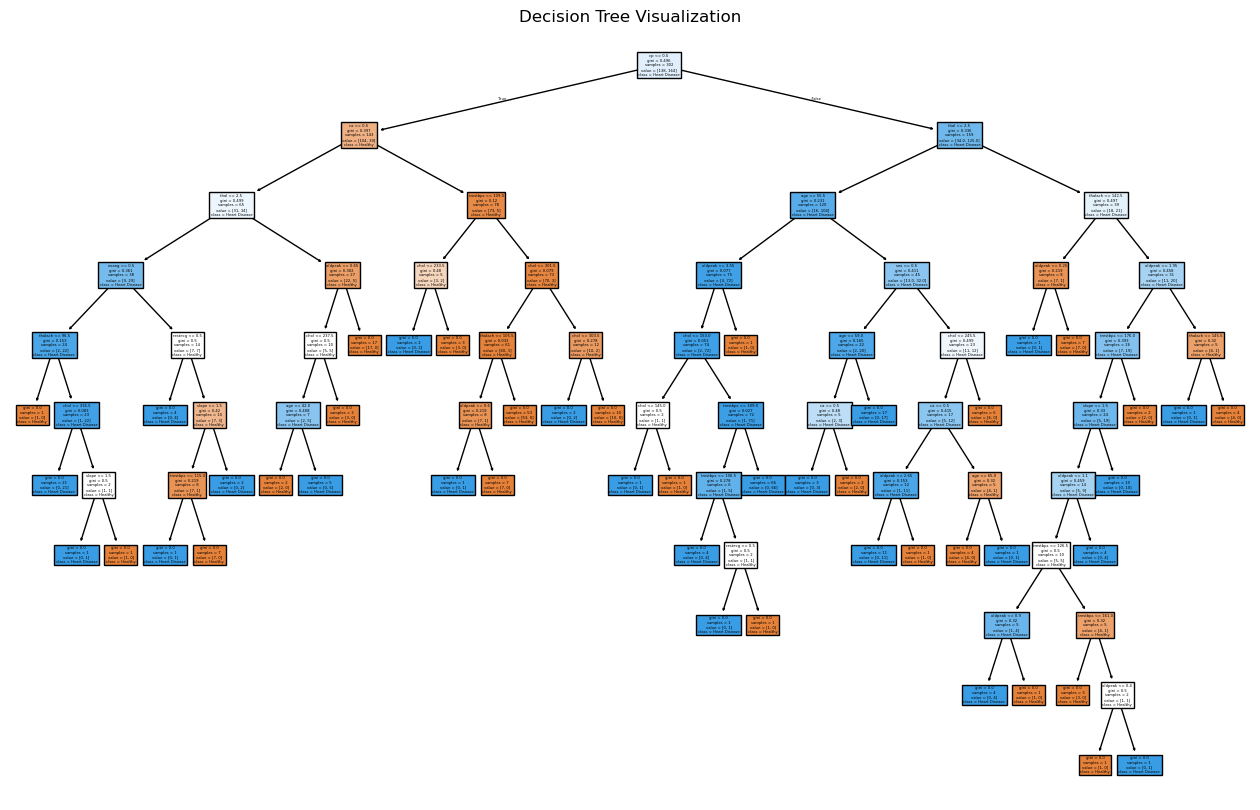

In [152]:
# Plot Decision Tree
plt.figure(figsize=(16,10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=["Healthy", "Heart Disease"])
plt.title("Decision Tree Visualization")
plt.show()

### Identiyfing Feature Importance

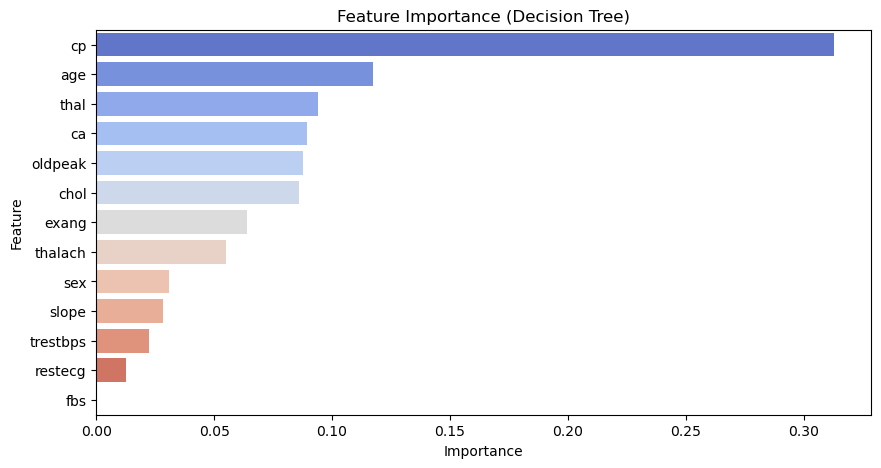

In [145]:
# Get feature importance
importance = pd.DataFrame({"Feature": X.columns, "Importance": tree.feature_importances_})
importance = importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance, palette="coolwarm")
plt.title("Feature Importance (Decision Tree)")
plt.show()


## Gradient Boosting Classifier

In [146]:
gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)


In [149]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {accuracy:.2f}")

Accuracy:  0.85


In [150]:
y_prob = gb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC:  {auc_roc:.2f}")

AUC-ROC:  0.91


## Conclusion

- Logistic Regression: 
Accuracy = 0.84 AUC-ROC = 0.86

- SVM:
Accuracy = 0.82 AUC-ROC = 0.85

- Decision Tree:
Accuracy = 0.1 AUC-ROC = 0.1

- Gradient Boosting Classifier:
Accuracy = 0.85 AUC-ROC = 0.91

**Model Performance Analysis**

**Logistic Regression**

Accuracy: 0.84
AUC-ROC: 0.86
Logistic Regression is a simple, interpretable model that performs well when relationships in the data are linear. The accuracy and AUC-ROC scores indicate that it is a solid choice, but it might not capture complex patterns as well as more advanced models.

**Support Vector Machine (SVM)**

Accuracy: 0.82
AUC-ROC: 0.85
SVM is powerful, especially when using non-linear kernels, but it may struggle with large datasets due to high computational cost. The results show slightly lower performance than Logistic Regression, suggesting that it may not be the best option in this case.

**Decision Tree**

Accuracy: 0.1
AUC-ROC: 0.1
The Decision Tree is performing extremely poorly, indicating overfitting or improper hyperparameters (e.g., depth too high or too low). A decision tree alone is often too simple, but it can be useful as part of an ensemble method like Random Forest or Gradient Boosting.

**Gradient Boosting Classifier (GBC)**

Accuracy: 0.85
AUC-ROC: 0.91
Gradient Boosting outperforms all other models, achieving the highest AUC-ROC (0.91) and the highest accuracy (0.85). This suggests that it captures complex patterns in the data while maintaining generalizability.

**Recommended Model: Gradient Boosting Classifier.**
**Why?**

It has the highest AUC-ROC score, meaning it has the best ability to distinguish between classes.
It slightly outperforms Logistic Regression in accuracy while handling non-linearity better.
Unlike Decision Trees, which tend to overfit, Gradient Boosting reduces bias and variance through boosting.
However, Gradient Boosting can be computationally expensive, especially with large datasets. If you need a faster, simpler model, Logistic Regression is a good alternative.